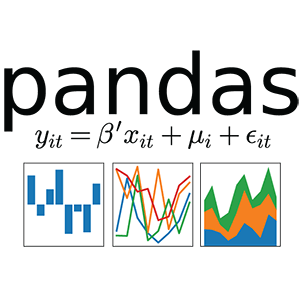

# Outlines
* What is Pandas Concatenation?
* Create two different DataFrames
* Concat
* Keys
* Append second DataFrame as a column
* Join DataFrames with a series
* merge

# What is Pandas concatenation?

**Concatenation is an operation when you want to join 2 or more DataFrames.**



# Create two different DataFrames

In [26]:
import pandas as pd

india_weather = pd.DataFrame({
    'city':['mumbai','dehli','benglore'],
    'temperature':[32,45,30],
    'humidity':[80,65,78]
})

india_weather

,city,temperature,humidity
0,mumbai,32,80
1,dehli,45,65
2,benglore,30,78


In [27]:
Us_weather = pd.DataFrame({
    'city':['new york','chicago','orlando'],
    'temperature':[21,14,35],
    'humidity':[68,65,75]
})

Us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


# Concat

In [28]:
cf = pd.concat([india_weather,Us_weather])
cf

,city,temperature,humidity
0,mumbai,32,80
1,dehli,45,65
2,benglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [29]:
# correct indexes
cf = pd.concat([india_weather,Us_weather],ignore_index=True)
cf

,city,temperature,humidity
0,mumbai,32,80
1,dehli,45,65
2,benglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


# Keys

In [34]:
cf = pd.concat([india_weather,Us_weather],keys=['india','US'])
cf

city  temperature  humidity
india 0    mumbai           32        80
      1     dehli           45        65
      2  benglore           30        78
US    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [32]:
# access the subset of your DataFrame
cf.loc['india']

,city,temperature,humidity
0,mumbai,32,80
1,dehli,45,65
2,benglore,30,78


In [35]:
cf.loc['US']

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


# append second dataframe as a column

In [37]:
temperature_df =pd.DataFrame( {
    'city': ['mumbai','dehli','banglore'],
    'temperature':[32,45,30]
})
temperature_df

,city,temperature
0,mumbai,32
1,dehli,45
2,banglore,30


In [38]:
windspeed_df =pd.DataFrame( {
    'city': ['mumbai','dehli','banglore'],
    'windspeed':[7,12,20]
})
windspeed_df

,city,windspeed
0,mumbai,7
1,dehli,12
2,banglore,20


In [40]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,7
1,dehli,45,dehli,12
2,banglore,30,banglore,20


**What if the order of cities are different?**

In [42]:
windspeed_df =pd.DataFrame( {
    'city': ['dehli','banglore'],
    'windspeed':[7,12]
})
windspeed_df

,city,windspeed
0,dehli,7
1,banglore,12


In [43]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,dehli,7.0
1,dehli,45,banglore,12.0
2,banglore,30,NaN,NaN


**This dosn't look True. You should use index argument to solve the problem.**

In [44]:
windspeed_df =pd.DataFrame( {
    'city': ['mumbai','dehli','banglore'],
    'windspeed':[7,12,20]
},index=[0,1,2])
windspeed_df

,city,windspeed
0,mumbai,7
1,dehli,12
2,banglore,20


In [45]:
windspeed_df =pd.DataFrame( {
    'city': ['dehli','banglore'],
    'windspeed':[7,12]
},index=[1,2])
windspeed_df

,city,windspeed
1,dehli,7
2,banglore,12


In [47]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,NaN,NaN
1,dehli,45,dehli,7.0
2,banglore,30,banglore,12.0


**index is a way to align rows from different DataFrames while using concat operation.**

# Join DataFrames with a series

In [48]:
temperature_df

,city,temperature
0,mumbai,32
1,dehli,45
2,banglore,30


In [51]:
s = pd.Series(['Humid','Dry','Rain'],name='event')
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [52]:
# Append these series to temperature_df

df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,Humid
1,dehli,45,Dry
2,banglore,30,Rain


[Click here for more information about pandas concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

# merge

In [53]:
import pandas as pd

df1 = pd.DataFrame({
    'city':['new york','chicago','orlando'],
    'temperature':[21,14,25],
    })

df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,25


In [56]:
df2 = pd.DataFrame({
    'city':['chicago','new york','orlando'],
    'humidity':[65,68,75],
    })

df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [55]:
df3 = pd.merge(df1,df2,on='city')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,25,75


**The advantage of using merge over concat is that it is not required to specified index.**

## Consider df4 and df5 where the name of cities are not the same

In [57]:
df4 = pd.DataFrame({
    'city':['new york','chicago','orlando','baltimor'],
    'temperature':[21,14,25,32],
    })

df4

,city,temperature
0,new york,21
1,chicago,14
2,orlando,25
3,baltimor,32


In [58]:
df5 = pd.DataFrame({
    'city':['chicago','new york','san francisco'],
    'humidity':[65,68,71],
    })

df5

,city,humidity
0,chicago,65
1,new york,68
2,san francisco,71


In [59]:
df6 = pd.merge(df4,df5,on='city')
df6

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


**Only the common cities are printed**

In [61]:
df = pd.merge(df4,df5,on='city',how='outer')
df

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,25.0,NaN
3,baltimor,32.0,NaN
4,san francisco,NaN,71.0


In [62]:
# left join
df = pd.merge(df4,df5,on='city',how='left')
df

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,25,NaN
3,baltimor,32,NaN


In [63]:
# right join
df = pd.merge(df4,df5,on='city',how='right')
df

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san francisco,NaN,71


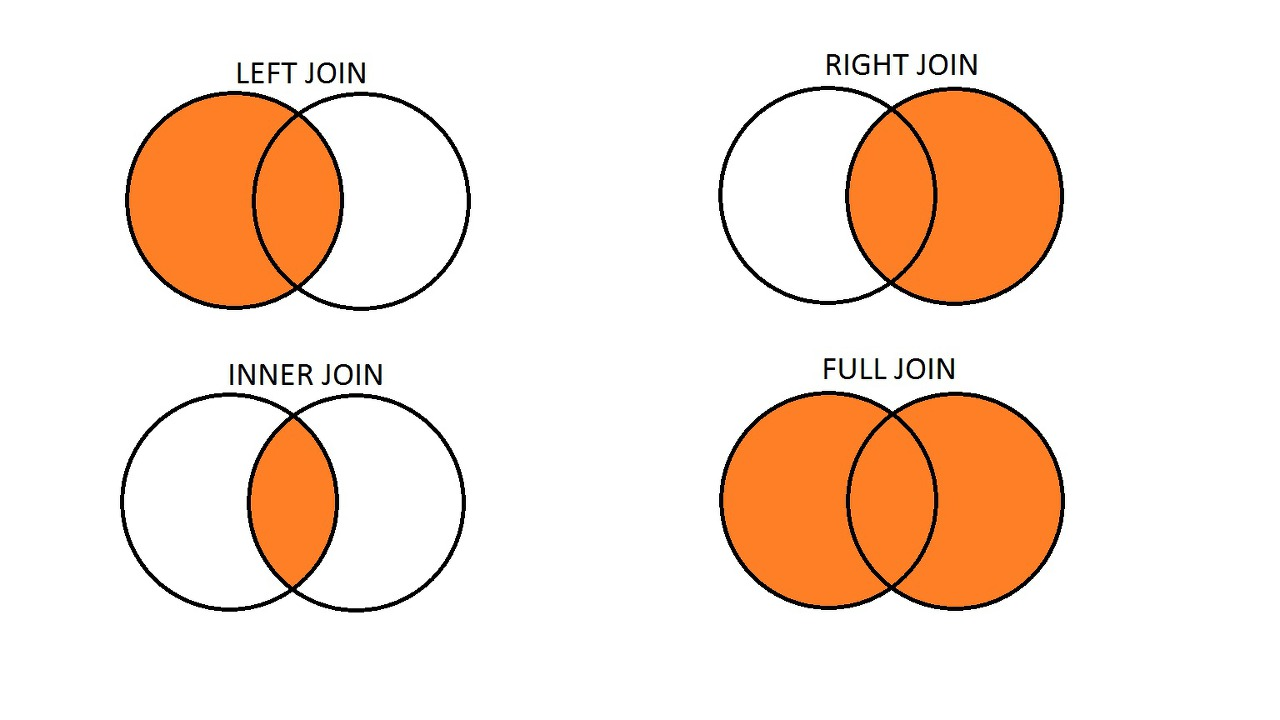

In [65]:
# Specify NaN belongs to which DataFrame
df = pd.merge(df4,df5,on='city',how='outer',indicator=True)
df

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,25.0,NaN,left_only
3,baltimor,32.0,NaN,left_only
4,san francisco,NaN,71.0,right_only


[Click here for more information about Pandas merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-07-28    |   <font color=blue>**Ehsan Zia**</font>  |  |  |

